### Student Information
Name: 許誼亭

Student ID: 112034561

GitHub ID: vvveat

Kaggle name:TTTTTTT_15

Kaggle private scoreboard snapshot:

![Snapshot](pics/pic.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [56]:
### Begin Assignment Here

# First

## Load DM2023-Lab1 Data

In [57]:
import pandas as pd
# my functions
import helpers.data_mining_helpers as dmh
data_amazon=pd.read_csv(r"C:\Users\user\Music\Desktop\資料探勘\DMLab1\DM2023-Lab1-Master\Homework\sentiment labelled sentences\amazon_cells_labelled.txt", sep='\t',header=None)
data_imdb=pd.read_csv(r"C:\Users\user\Music\Desktop\資料探勘\DMLab1\DM2023-Lab1-Master\Homework\sentiment labelled sentences\imdb_labelled.txt", sep='\t',header=None,quoting=3)
data_yelp=pd.read_csv(r"C:\Users\user\Music\Desktop\資料探勘\DMLab1\DM2023-Lab1-Master\Homework\sentiment labelled sentences\yelp_labelled.txt", sep='\t',header=None)
data_columns=["text","label"]
data_amazon.columns=data_columns
data_imdb.columns=data_columns
data_yelp.columns=data_columns
display(data_amazon)
display(data_imdb)
display(data_yelp)

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


,text,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [58]:
# Combine three dataset
all_data=pd.concat([data_amazon,data_imdb,data_yelp],axis=0,ignore_index=True)
display(all_data)

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# Word Frequency
count_vect = CountVectorizer()
all_data_counts = count_vect.fit_transform(all_data.text)
print('-----Count-----')
print('all_data:', all_data_counts.shape)
frequency_result = pd.DataFrame(all_data_counts.toarray(), columns = count_vect.get_feature_names_out())
display(frequency_result)


-----Count-----
all_data: (3000, 5155)


,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from sklearn.model_selection import train_test_split
# split word frequency's train、test data
train_data, test_data = train_test_split(frequency_result, test_size=0.2, random_state=42)
print('train:', train_data.shape)
print('test:', test_data.shape)

train: (2400, 5155)
test: (600, 5155)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


### Exercise 1 Answer

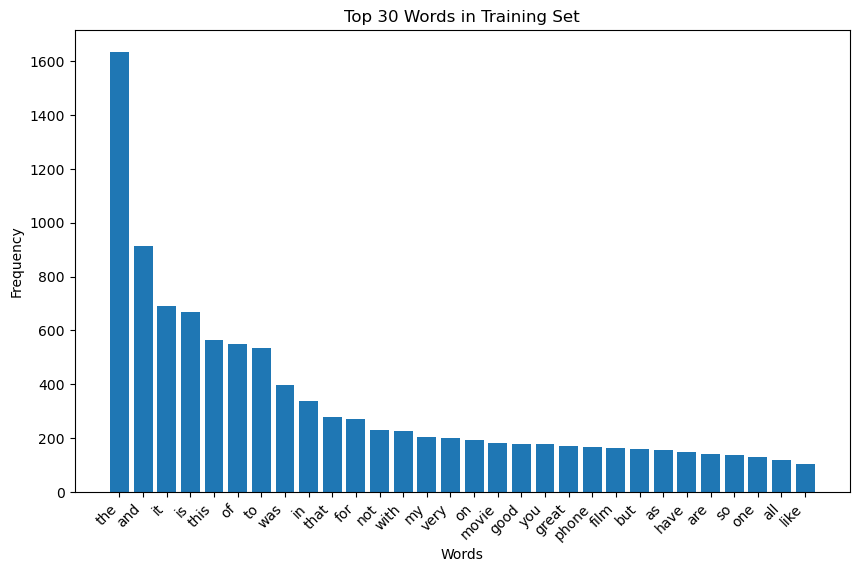

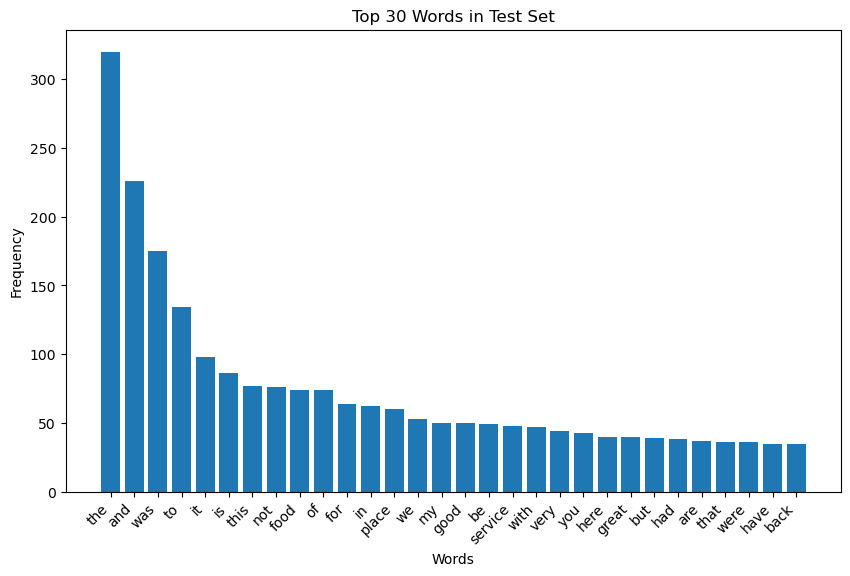

In [61]:
import matplotlib.pyplot as plt

# Sum the frequencies of each word in the training set
word_freq_train = frequency_result[:len(train_data)]

# Get the feature names (words)
feature_names = count_vect.get_feature_names_out()

# Create a DataFrame to store word frequencies and corresponding words for training set
word_freq_df_train = pd.DataFrame({'Word': feature_names, 'Frequency': word_freq_train.sum(axis=0)})

# Sort the DataFrame by frequency in descending order
word_freq_df_train = word_freq_df_train.sort_values(by='Frequency', ascending=False)

# Plot the word frequency for the top 30 words in the training set
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df_train['Word'][:30], word_freq_df_train['Frequency'][:30])
plt.title('Top 30 Words in Training Set')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sum the frequencies of each word in the test set
word_freq_test = frequency_result[len(train_data):]

# Create a DataFrame to store word frequencies and corresponding words for test set
word_freq_df_test = pd.DataFrame({'Word': feature_names, 'Frequency': word_freq_test.sum(axis=0)})

# Sort the DataFrame by frequency in descending order
word_freq_df_test = word_freq_df_test.sort_values(by='Frequency', ascending=False)

# Plot the word frequency for the top 30 words in the test set
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df_test['Word'][:30], word_freq_df_test['Frequency'][:30])
plt.title('Top 30 Words in Test Set')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


In [62]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load Lab2-Master Data

In [63]:
import pandas as pd

### training data
anger_train = pd.read_csv("C:/Users/user/Music/Desktop/資料探勘/DMLab2/DM2023-Lab2-Master/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("C:/Users/user/Music/Desktop/資料探勘/DMLab2/DM2023-Lab2-Master/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("C:/Users/user/Music/Desktop/資料探勘/DMLab2/DM2023-Lab2-Master/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("C:/Users/user/Music/Desktop/資料探勘/DMLab2/DM2023-Lab2-Master/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [64]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [65]:
### testing data
anger_test = pd.read_csv("C:/Users/user/Music/Desktop/資料探勘/DMLab2/DM2023-Lab2-Master/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("C:/Users/user/Music/Desktop/資料探勘/DMLab2/DM2023-Lab2-Master/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("C:/Users/user/Music/Desktop/資料探勘/DMLab2/DM2023-Lab2-Master/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("C:/Users/user/Music/Desktop/資料探勘/DMLab2/DM2023-Lab2-Master/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [66]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [67]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


# Save Data 

In [68]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [69]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [72]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [73]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

### Exercise 2 Answer

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
tfidf_vect = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
all_data_tfidf = tfidf_vect.fit_transform(train_df['text'])
print('-----TDIDF-----')
print('all_data:', all_data_tfidf.shape)
print(all_data_tfidf[0])

-----TDIDF-----
all_data: (3613, 1000)
  (0, 0)	0.7624960355871784
  (0, 418)	0.3009230081523527
  (0, 87)	0.3194560391631499
  (0, 649)	0.3246564320492368
  (0, 466)	0.13593407658709966
  (0, 81)	0.27759530181399755
  (0, 572)	0.15828440947495284


In [75]:
# observe some feature names
feature_names_1000 = tfidf_vect.get_feature_names_out()
feature_names_1000[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

In [76]:
"😂" in feature_names_1000

True

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [77]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [78]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'sadness', 'anger', 'fear', 'joy', 'anger', 'sadness',
       'fear', 'anger', 'sadness'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [79]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [80]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_train, y_pred=y_train_pred))
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.97      1.00      0.98       857
        fear       0.98      1.00      0.99      1147
         joy       1.00      1.00      1.00       823
     sadness       1.00      0.94      0.97       786

    accuracy                           0.99      3613
   macro avg       0.99      0.98      0.99      3613
weighted avg       0.99      0.99      0.99      3613

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [81]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [82]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

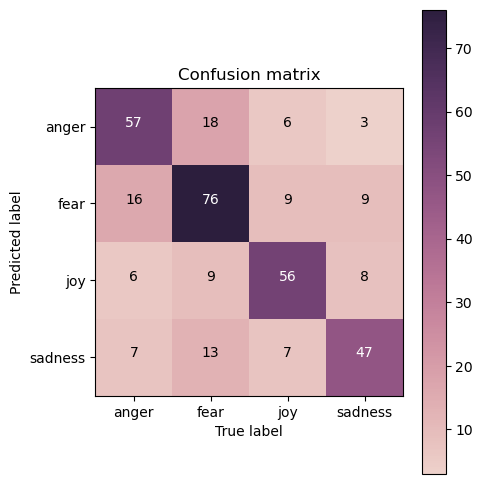

In [83]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### Exercise 3 Answer

#### 
1. Anger is more distinguishable from fear,Fear is more distinguishable from anger,Joy is more distinguishable from sadness,Joy is more distinguishable from both fear and sadness.

2. A lower recall for Sadness suggests that the model tends to miss some actual Sadness samples when predicting this category, leading to instances of false negatives. This indicates a relatively poorer predictive performance of the model for the Sadness category.

3. The data predicted as fear at the end has the highest support, indicating that there are 110 samples labeled as fear in the entire test set

4. A higher precision for the "joy" class indicates that the model's predictions for the "joy" category are relatively reliable, with fewer instances of misclassifying samples from other categories as "joy."

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

### Exercise 4 Answer

In [84]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
y_train_pred_NB=model_nb.predict(X_train)
y_test_pred_NB=model_nb.predict(X_test)

In [85]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [86]:
### Compare train and test
print(classification_report(y_true=y_train, y_pred=y_train_pred_NB))
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

              precision    recall  f1-score   support

       anger       0.77      0.80      0.78       857
        fear       0.78      0.81      0.79      1147
         joy       0.87      0.80      0.83       823
     sadness       0.76      0.75      0.76       786

    accuracy                           0.79      3613
   macro avg       0.79      0.79      0.79      3613
weighted avg       0.79      0.79      0.79      3613

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Exercise 5 Answer

1.The nature of the data plays a crucial role. If the data has many categorical features with strong dependencies, a decision tree might outperform NB. On the other hand, if the independence assumption of NB holds and the features are mostly independent, NB might be competitive.

2.Naive Bayes result is better than DecisionTree,because NB model is a very simple and easy-to-implement model. It relies on the assumption of independence between features, making parameter estimation relatively straightforward. This simplicity is advantageous when dealing with text data.When dealing with data of simple structure, decision trees may perform poorly due to overfitting.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

In [87]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [88]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    #return keras.utils.to_categorical(enc)
    # for newer version of keras
    return to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1033     fear
1206     fear
115     anger
2427      joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [89]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [90]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

In [91]:
import pandas as pd
from keras.callbacks import Callback
class CustomLogger(Callback):
    def __init__(self, filename, encoding='utf-8'):
        super(CustomLogger, self).__init__()
        self.filename = filename
        self.encoding = encoding
        self.header_written = False

    def on_epoch_end(self, epoch, logs=None):
        logs['epoch'] = epoch + 1
        df = pd.DataFrame([logs])

        # 寫入 CSV 文件，可以指定 encoding
        df.to_csv(self.filename, mode='a', header=not self.header_written, encoding=self.encoding, index=False)

        if not self.header_written:
            self.header_written = True

In [92]:
from keras.callbacks import CSVLogger

custom_logger = CustomLogger('training_log.csv', encoding='utf-8')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[custom_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 4s 6ms/step - loss: 1.3299 - accuracy: 0.3626 - val_loss: 1.2825 - val_accuracy: 0.3718 - epoch: 1.0000
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 1.0091 - accuracy: 0.6269 - val_loss: 0.9370 - val_accuracy: 0.6686 - epoch: 2.0000
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.7949 - val_loss: 0.7769 - val_accuracy: 0.7147 - epoch: 3.0000
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8403 - val_loss: 0.7550 - val_accuracy: 0.7176 - epoch: 4.0000
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8813 - val_loss: 0.7866 - val_accuracy: 0.7233 - epoch: 5.0000
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.9070 - val_loss: 0.8580 - val_accuracy: 0.6916 - epoch: 6.0000
Epoch 7/25
113/113 [==============================] 

In [93]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array([[7.6396177e-03, 1.5960275e-05, 5.2550249e-08, 9.9234432e-01],
       [3.1843432e-05, 4.3758316e-04, 5.7110508e-05, 9.9947339e-01],
       [1.5219305e-02, 6.9295222e-01, 2.7929831e-01, 1.2530122e-02],
       [7.9864735e-04, 5.0789064e-01, 1.1271425e-03, 4.9018356e-01],
       [2.2000314e-04, 6.9233761e-06, 9.9976605e-01, 6.9986836e-06]],
      dtype=float32)

In [94]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'sadness', 'fear', 'fear', 'joy'], dtype=object)

In [95]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


In [96]:
## precision, recall, f1-score for test data
print(classification_report(y_true=label_decode(label_encoder, y_test), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.63      0.64      0.64        84
        fear       0.70      0.73      0.71       110
         joy       0.78      0.71      0.74        79
     sadness       0.65      0.65      0.65        74

    accuracy                           0.69       347
   macro avg       0.69      0.68      0.68       347
weighted avg       0.69      0.69      0.69       347



In [97]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.329857,0.362580,1.282526,0.371758,1
1,1.009105,0.626903,0.937043,0.668588,2
2,0.593725,0.794907,0.776859,0.714697,3
3,0.420070,0.840299,0.754981,0.717579,4
4,0.331936,0.881262,0.786637,0.723343,5
5,0.273937,0.907003,0.857972,0.691643,6
6,0.228739,0.922779,0.913819,0.680115,7
7,0.195183,0.936064,0.966378,0.703170,8
8,0.163292,0.949903,1.014857,0.708934,9
9,0.139114,0.957376,1.124442,0.688761,10


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

### Exercise 6 Answer

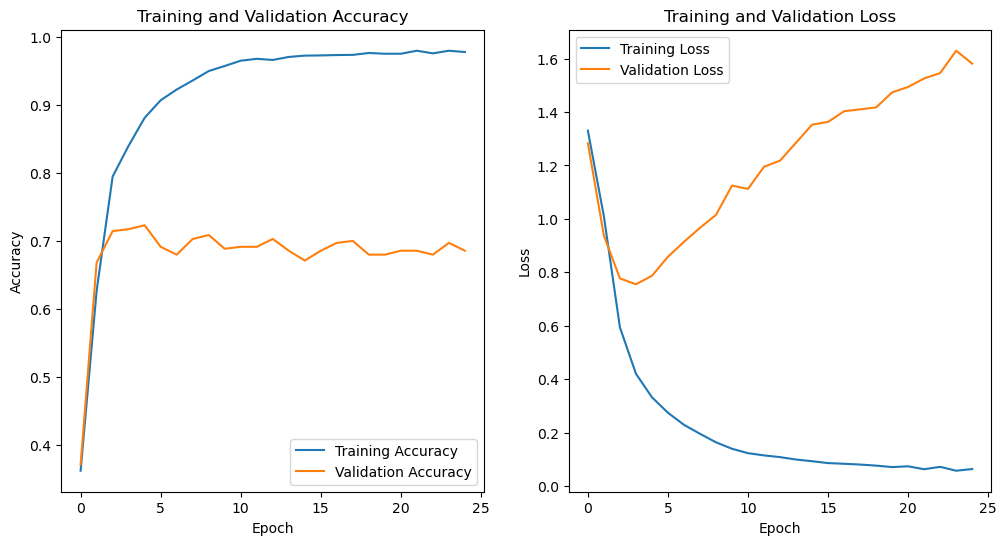

In [98]:
training_acc = training_log['accuracy']
validation_acc = training_log['val_accuracy']
loss_train = training_log['loss']
loss_val = training_log['val_loss']


# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(training_acc, label='Training Accuracy')
plt.plot(validation_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(loss_train, label='Training Loss')
plt.plot(loss_val, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

###
The accuracy of the training data is close to 1 after epoch 10, and the validation shows that there is no improvement after epoch 5.

In the picture on the right, the loss of validation data is getting higher and higher, while the loss of training data is getting lower and lower.


It's Overfitting!

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

In [99]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1033,20176,My anxiety is playing around HELP!!!!!,"[My, anxiety, is, playing, around, HELP, !, !,..."
1206,20349,#NewYork: Several #Baloch &amp; Indian activis...,"[#, NewYork, :, Several, #, Baloch, &, amp, ;,..."
115,10115,A @FirstBSA not turning up? Why am I not surpr...,"[A, @, FirstBSA, not, turning, up, ?, Why, am,..."
2427,30423,Always doing the EmotionalHedge™ w #WPS\n\nI'm...,"[Always, doing, the, EmotionalHedge™, w, #, WP..."
168,10168,@bt_uk why does tracking show my equipment del...,"[@, bt_uk, why, does, tracking, show, my, equi..."


In [100]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['My', 'anxiety', 'is', 'playing', 'around', 'HELP', '!', '!', '!', '!', '!']),
       list(['#', 'NewYork', ':', 'Several', '#', 'Baloch', '&', 'amp', ';', 'Indian', 'activists', 'hold', 'demonstrations', 'outside', '@', 'UN', 'headquarters', 'demanding', 'Pak', 'to', 'stop', 'exporting', '#', 'terror', 'into', 'India']),
       list(['A', '@', 'FirstBSA', 'not', 'turning', 'up', '?', 'Why', 'am', 'I', 'not', 'surprised', '.', 'Late', 'for', 'work', 'again', '!', '#', 'fuming'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [101]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

### 7.3 Generating word vector (embeddings)

In [102]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 6.16790533e-01,  5.66805184e-01,  1.35620028e-01,  1.21803775e-01,
       -2.72106618e-01, -9.51429904e-01,  4.28555936e-01,  1.16781306e+00,
       -1.81986898e-01, -6.09467864e-01, -3.40301722e-01, -6.38847351e-01,
       -6.29931509e-01,  1.16528392e-01, -2.06145883e-01, -5.18513441e-01,
        3.29325885e-01, -3.77464414e-01,  5.15732884e-01, -9.15925860e-01,
        2.89947182e-01,  7.87169099e-01,  2.42441297e-01, -3.61262560e-01,
        1.87107727e-01,  1.17557704e-01, -9.64394808e-01,  4.16723937e-01,
       -5.78470528e-01, -1.28625900e-01,  3.32560599e-01,  7.69675672e-02,
        7.26436317e-01, -9.41877067e-01, -2.15673391e-02,  6.93360865e-01,
        1.09063558e-01,  9.33052748e-02, -3.67560685e-01, -3.64196450e-01,
       -1.37057930e-01,  5.97197562e-02, -4.29769158e-01,  3.66928391e-02,
        2.51260132e-01, -2.58552372e-01, -1.16323400e+00,  3.82121354e-01,
        5.90249956e-01,  5.75006783e-01, -2.43278176e-01, -8.17575037e-01,
       -1.49331346e-01,  

In [103]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('bday', 0.9236787557601929),
 ('free', 0.9214680194854736),
 ('birthday', 0.9163359999656677),
 ('cry', 0.9108696579933167),
 ('help', 0.9005342125892639),
 ('plz', 0.8905633687973022),
 ('Be', 0.8883126974105835),
 ('O', 0.8875585794448853),
 ('home-owning', 0.8873719573020935),
 ('romance', 0.8853397965431213)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [104]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [105]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [106]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### Exercise 7 Answer

###

1.Average Word Vectors:
* Compute the word vector for each word in the sentence.
* Average thes

2.Weighted Average Word Vectors:
* Assign weights to word vectors based on their importance in the sentence.
* Multiply each word vector by its corresponding weight,then average them.

3.Doc2Vec:
* Train a paragraph vector (or document vector) using algorithms like Doc2Vec.
* This approach captures the semantics of the entire sentence

4.Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM):
* Use recurrent neural networks or LSTM networks to process sequential data.
* The hidden state of the network after processing the entire sequence can be used as a representation of the sentence




## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [107]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE (2-dimension)

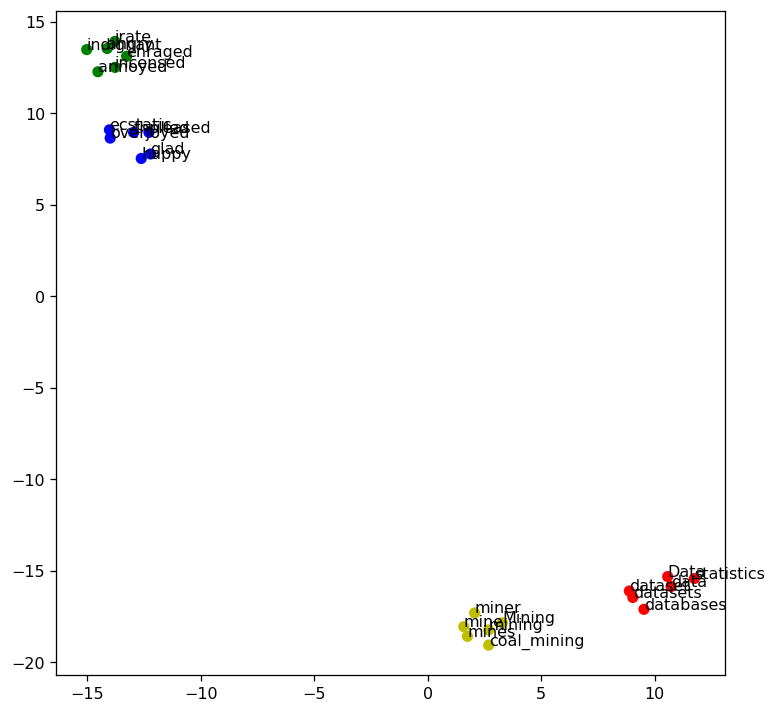

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

### Exercise 8 Answer

In [109]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

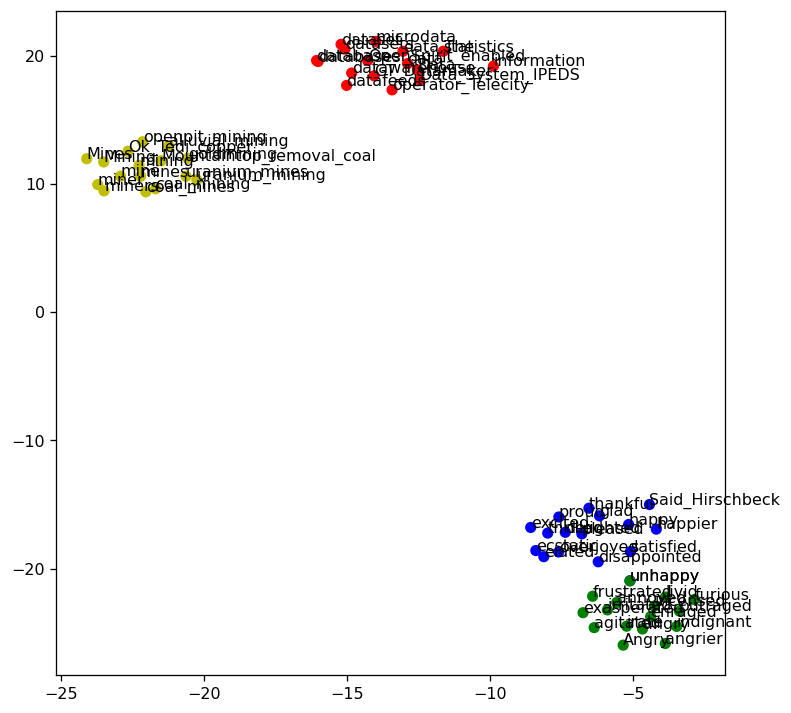

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Second : Kaggle Competition

Kaggle name : TTTTTTT_15

Kaggle private scoreboard snapshot: [Snapshot](pics/pic.png)

# Third : Kaggle Report

In the Kaggle competition, I first imported the data and then extracted tweet and tweet_id from JSON-formatted data containing original Twitter documents. I conducted Exploratory Data Analysis (EDA) to observe emotion distribution, finding "joy" as the most prevalent category.

For data preprocessing, I used Tokenization, Lemmatization, and Sentiment method. 
Then,I split the data into training and testing sets, transforming the training data into TF-IDF vectors and applying the same transformation to the testing data.

Finally, I experimented with models such as CatBoost, XGBoost, RandomForest, and DecisionTree for prediction, The best one model is Catboost.
I also tried the SMOTE method, but the results were not good.

For more details, refer to my code. Thank you.

## Lold Data

In [ ]:
import pandas as pd

### training data
data_identification = pd.read_csv("data_identification.csv")
emotion = pd.read_csv("emotion.csv")


In [ ]:
import json

id_list = []
text_list = []

with open('tweets_DM.json', 'r') as file:
    # 讀取文件的每一行
    for line in file:
        # 將每一行的 JSON 字符串轉換為 Python 對象
        data = json.loads(line)
        
        # 提取所需的數據
        id_list.append(data['_source']['tweet']['tweet_id'])
        text_list.append(data['_source']['tweet']['text'])

# 將提取的數據組成一個字典
data_tweet = {"tweet_id": id_list, "text": text_list}

# 將字典轉換為 DataFrame
df_tweet = pd.DataFrame(data_tweet)

# 顯示 DataFrame 的前幾行
df_tweet.head()


In [ ]:
data_identification[data_identification['identification'] == 'test']

In [ ]:
example_submission = pd.read_csv('sampleSubmission.csv')

In [ ]:
df_1 = pd.merge(data_identification,emotion,on='tweet_id',how='left')
df_all = pd.merge(df_1,df_tweet,on='tweet_id',how='left')
display(df_all)

## Data Preprocessing

### EDA

In [ ]:
# group to find distribution
df_all.groupby(['emotion']).count()['tweet_id']

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = df_all['emotion'].unique()
post_total = len(df_all)
df1 = df_all.groupby(['emotion']).count()['tweet_id']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(8,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

### Tokenize、Lemmatizer、Sentiment

In [ ]:
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

### 
Interpret sentiment scores:

* If Sentiment > 0, the text is considered positive.
* If Sentiment < 0, the text is considered negative.
* If Sentiment = 0, the text is considered neutral.

In [ ]:
stop_words = set(stopwords.words('english'))

def analyze_sentiment(text):
    words = word_tokenize(str(text))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# 將 'token' 列的值設置為分詞結果
df_all['token'] = df_all['text'].apply(analyze_sentiment)

# 在 'Sentiment' 列中存儲情感性質
df_all['Sentiment'] = df_all['text'].apply(lambda x: TextBlob(analyze_sentiment(x)).sentiment.polarity)
df_all['Sentiment'] = df_all['Sentiment'].apply(lambda x: round(x, 2))



In [ ]:
display(df_all)

In [ ]:
df_all_copy = df_all.copy()

## Split Data

In [ ]:
#train
df_train = df_all_copy[df_all_copy['identification'] == 'train'].copy()
df_train.reset_index(drop = True,inplace=True)
df_train = df_train.drop('identification',axis=1)
#test
df_test = df_all_copy[df_all_copy['identification'] == 'test'].copy()
df_test.reset_index(drop = True,inplace=True)
df_test = df_test.drop('identification',axis=1)

In [ ]:
display(df_train)

In [ ]:
print("Shape of Training df: ", df_train.shape)
print("Shape of Testing df: ", df_test.shape)

In [ ]:
X = df_train[['Sentiment']]
y = df_train[['emotion']]

In [ ]:
print(X.shape)

### Test Data(X,y 處理)

In [ ]:
X_test_1 = df_test[['Sentiment']]
y_test_1 = df_test[['emotion']]

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(df_train['token'])
X_test_tfidf = vectorizer.transform(df_test['token'])

In [ ]:
print(X_train_tfidf.shape)

In [ ]:
print(X_train_tfidf.shape)
print(X.shape)


In [ ]:
display(X_test_1)

In [ ]:
from scipy.sparse import hstack

# 將 TF-IDF 轉換後的特徵矩陣和原始的 X 資料結合
X_train = hstack([X_train_tfidf, X])
X_test = hstack([X_test_tfidf, X_test_1])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# 將目標變量 'emotion' 轉換為數字
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
X = X_train
y = y_encoded

## Data Imbalance

In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # 使用 SMOTE 處理多類別不平衡
# smote = SMOTE(sampling_strategy='auto', random_state=42, n_jobs=-1)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_encoded)

# print('Resampled dataset shape %s' % Counter(y_resampled))
# print('Resampled dataset shape %s' % Counter(y_resampled))
# print("Number of rows in X_resampled: ", X_resampled.shape[0])
# print("Number of rows in y_resampled: ", len(y_resampled))



In [ ]:
# print('Resampled dataset shape %s' % Counter(y_resampled))
# print('Resampled dataset shape %s' % Counter(y_resampled))
# print("Number of rows in X_resampled: ", X_resampled.shape[0])
# print("Number of rows in y_resampled: ", len(y_resampled))

In [ ]:
# X = X_resampled
# y = y_resampled

## Model

### cat

In [ ]:
from catboost import CatBoostClassifier
import catboost as cat


params = {
    'iterations': 500,          # 迭代次數
    'learning_rate': 0.05,      # 學習率
    'depth': 10,                # 樹的深度
    'l2_leaf_reg': 3,           # L2 正則化項
    'border_count': 32,         # 類別特徵的數量
    'thread_count': 4,          # CPU 線程數
    'eval_metric': 'AUC',       # 評估指標，可以選擇其他指標，如Accuracy
    'verbose': 200              # 控制訓練過程中的輸出信息，每200次迭代輸出一次信息
}

model = CatBoostClassifier(**params)
print('Train_result')
model.fit(X,y)
y_pred = model.predict(X)

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y, y_pred=y_pred)
#acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

print('training accuracy: {}'.format(round(acc_train, 2)))
#print('testing accuracy: {}'.format(round(acc_test, 2)))

In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y, y_pred=y_pred))

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y, y_pred=y_pred) 
print(cm)

In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [ ]:
# plot your confusion matrix
my_tags = ['anger','anticipation','disgust','fear','sadness','surprise','trust','joy']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [ ]:
# 將預測結果反向映射回原始文本標籤
predicted_emotion_text = le.inverse_transform(y_pred_test)

In [ ]:
predicted_emotion_text

### Output csv

In [ ]:
# 將原文本和預測結果合併
result_df = pd.DataFrame({'id': df_test['tweet_id'], 'emotion': predicted_emotion_text})
result_df.to_csv('231219_cat_smote.csv',index=False)